In [12]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
task_name = "evinf"

fname_short = f"faithfulness_metrics/{task_name}/topk-test-f1-metrics-description.json"

with open(fname_short, "r") as file : data_short = json.load(file) 
    
fname_long = f"double_faithfulness_metrics/{task_name}/topk-test-f1-metrics-description.json"

with open(fname_long, "r") as file : data_long = json.load(file) 


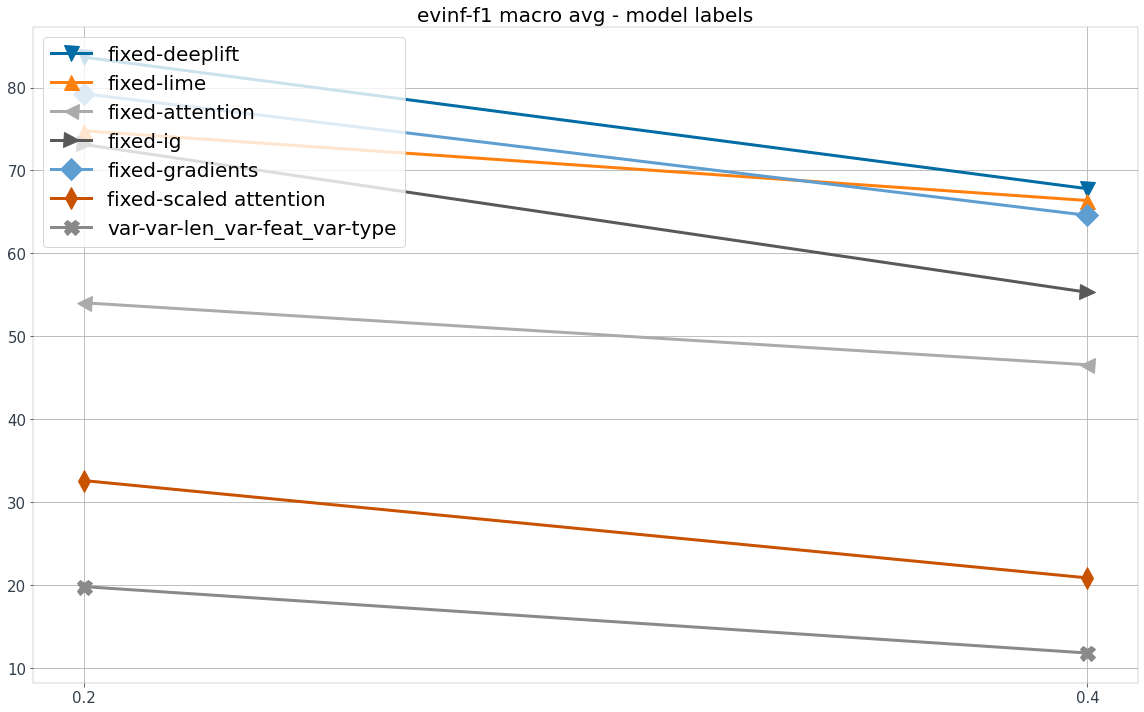

In [13]:
keep = {
    "fixed-deeplift" : {
        "marker" : "v"
    },
    "fixed-ig" : {
        "marker" : ">"
    },
    "fixed-lime" : {
        "marker" : "^"
    },
    "fixed-attention" : {
        "marker" : "<"
    },
    "fixed-scaled attention" : {
        "marker" : "d"
    },
    "fixed-gradients": {
        "marker" : "D"
    },
    "var-var-len_var-feat_var-type" : {
        "marker" : "X"
    }
}

metric = "f1 macro avg - model labels"

plt.style.use('tableau-colorblind10')
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.2
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams["font.variant"] = "small-caps"

fig, ax = plt.subplots(figsize = (16,10))

if task_name == "evinf":
    
    plt.xticks([0.2, 0.4], fontsize=15)
    
else:

    plt.xticks([0.2, 0.4], fontsize=15)

for feat_attr, val in data_long[metric].items():
    
    if feat_attr in keep:

        short = data_short[metric][feat_attr]
        long = val
        
        ax.plot(
            [0.2, 0.4],
            [short, long],
            marker=keep[feat_attr]["marker"],
            markersize = 15,
            linewidth = 3,
            label=feat_attr
        )
        

plt.legend(loc = "upper left", fontsize = 20)
plt.yticks(fontsize=15)

plt.title(f"{task_name}-{metric}", fontsize = 20)

plt.grid()
plt.tight_layout()

os.makedirs("graphs_and_tables/doubling_the_length_f1s/", exist_ok = True)

fig.savefig(f"graphs_and_tables/doubling_the_length_f1s/{task_name}-{metric}.png", dpi = 300)#, bbox_inches="tight")


In [6]:
data_long

{'f1 macro avg - model labels': {'fixed-deeplift': 63.61,
  'fixed-lime': 57.122,
  'fixed-attention': 69.061,
  'fixed-ig': 63.876,
  'fixed-gradients': 59.062,
  'fixed-scaled attention': 57.126,
  'fixed-random': 68.097,
  'fixed-fixed-len_var-feat': 38.105,
  'fixed-fixed-len_var-feat_var-type': 32.669,
  'var-deeplift': 55.482,
  'var-lime': 49.917,
  'var-attention': 62.699,
  'var-ig': 56.19,
  'var-gradients': 50.64,
  'var-scaled attention': 52.862,
  'var-random': 60.914,
  'var-var-len_var-feat': 32.262,
  'var-var-len_var-feat_var-type': 25.567},
 'f1 macro avg - actual labels': {'fixed-deeplift': 60.841,
  'fixed-lime': 54.502,
  'fixed-attention': 62.895,
  'fixed-ig': 60.133,
  'fixed-gradients': 56.495,
  'fixed-scaled attention': 56.507,
  'fixed-random': 62.244,
  'fixed-fixed-len_var-feat': 44.964,
  'fixed-fixed-len_var-feat_var-type': 41.772,
  'var-deeplift': 57.717,
  'var-lime': 51.51,
  'var-attention': 61.053,
  'var-ig': 57.578,
  'var-gradients': 53.923,
  '